In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("1000 Records.csv")

In [5]:
data.head()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,...,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,...,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,...,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,...,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,...,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh


In [6]:
print(data.shape)

(1000, 37)


In [10]:
data.dtypes

Emp ID                      int64
Name Prefix                object
First Name                 object
Middle Initial             object
Last Name                  object
Gender                     object
E Mail                     object
Father's Name              object
Mother's Name              object
Mother's Maiden Name       object
Date of Birth              object
Time of Birth              object
Age in Yrs.               float64
Weight in Kgs.              int64
Date of Joining            object
Quarter of Joining         object
Half of Joining            object
Year of Joining             int64
Month of Joining            int64
Month Name of Joining      object
Short Month                object
Day of Joining              int64
DOW of Joining             object
Short DOW                  object
Age in Company (Years)    float64
Salary                      int64
Last % Hike                object
SSN                        object
Phone No.                  object
Place Name    

In [7]:
data.describe()

,Emp ID,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary,Zip
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,549097.583000,40.377250,59.409000,2006.992000,6.415000,16.481000,10.093720,120288.528000,48698.499000
std,264810.879315,11.107729,13.900322,8.565588,3.428488,8.831514,8.568863,45178.339916,27396.021481
min,114425.000000,21.040000,40.000000,1980.000000,1.000000,1.000000,0.000000,40040.000000,1002.000000
25%,307757.000000,30.925000,49.000000,2002.000000,4.000000,9.000000,3.152500,82122.000000,25421.750000
50%,543073.000000,40.730000,57.000000,2009.000000,6.000000,17.000000,7.815000,119409.000000,47416.500000
75%,788450.250000,49.852500,68.000000,2014.000000,10.000000,24.000000,15.465000,159109.000000,71101.000000
max,999475.000000,59.980000,90.000000,2017.000000,12.000000,31.000000,37.570000,199943.000000,99791.000000


There are no missing Values --- Count is 1000 in all the columns

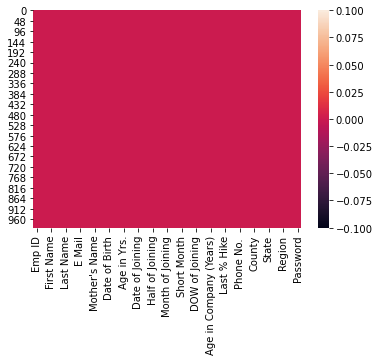

In [13]:
sns.heatmap(data.isnull())

Further proved by this heatmap

### Checking Corelation Between columns 

In [14]:
datacorr = data.corr()
datacorr

,Emp ID,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary,Zip
Emp ID,1.000000,-0.028516,0.028175,0.039009,0.000999,0.006178,-0.039064,-0.027248,0.020033
Age in Yrs.,-0.028516,1.000000,-0.065656,-0.676875,0.022617,-0.026387,0.676408,0.041422,-0.017266
Weight in Kgs.,0.028175,-0.065656,1.000000,0.058794,0.003933,-0.038591,-0.058846,0.061088,-0.021019
Year of Joining,0.039009,-0.676875,0.058794,1.000000,-0.029644,0.040820,-0.999435,-0.053501,0.027221
Month of Joining,0.000999,0.022617,0.003933,-0.029644,1.000000,0.046362,-0.003848,-0.019298,-0.028749
Day of Joining,0.006178,-0.026387,-0.038591,0.040820,0.046362,1.000000,-0.045185,-0.018947,0.028209
Age in Company (Years),-0.039064,0.676408,-0.058846,-0.999435,-0.003848,-0.045185,1.000000,0.054212,-0.026359
Salary,-0.027248,0.041422,0.061088,-0.053501,-0.019298,-0.018947,0.054212,1.000000,0.007518
Zip,0.020033,-0.017266,-0.021019,0.027221,-0.028749,0.028209,-0.026359,0.007518,1.000000


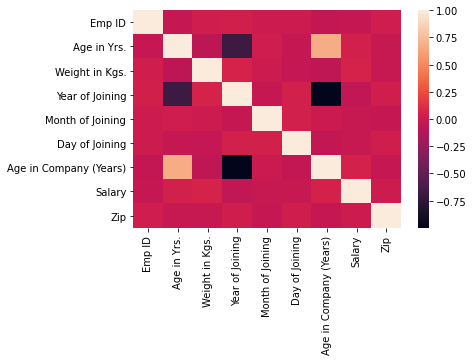

In [16]:
sns.heatmap(datacorr)

None of the Variables have High Co-relation with Salary

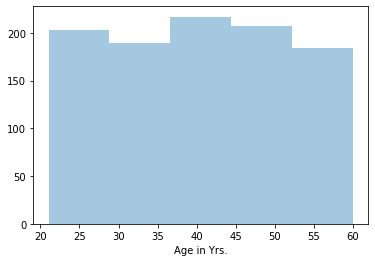

In [21]:
sns.distplot(data['Age in Yrs.'], kde=False, bins=5)    

Highest number of the Employees are around 40 years of age

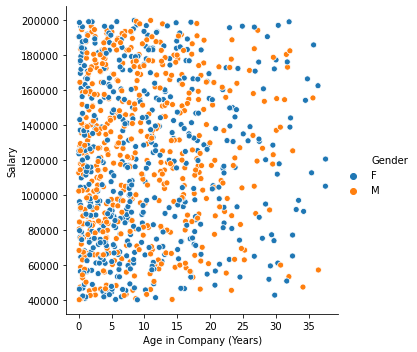

In [28]:
#sns.relplot(x="Age in Yrs.", y="Salary", hue="smoker", data=tips)
sns.relplot(x="Age in Company (Years)", y="Salary", hue="Gender", data = data)

Salary have no corelation with number of years in Company

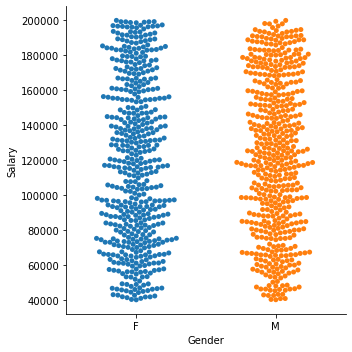

In [32]:
sns.catplot(x="Gender", y="Salary", data=data, kind= 'swarm')

No distinct baisedness in Male and Female Salary

### To predict Salary --- It will be a Regression Model 

In [18]:
data.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company (Years)', 'Salary',
       'Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password'],
      dtype='object')

#### Have to Drop the redundant columns

In [35]:
cols = ['Name Prefix', 'Gender','Age in Yrs.','Weight in Kgs.', 'Year of Joining', 'Month of Joining', 
        'Age in Company (Years)', 'Salary','Last % Hike','Region']
salary_DT= data[cols]
salary_DT.head()

,Name Prefix,Gender,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Age in Company (Years),Salary,Last % Hike,Region
0,Ms.,F,45.66,44,2010,12,6.61,119090,17%,West
1,Mr.,M,23.76,52,2017,4,0.26,117991,14%,Midwest
2,Drs.,F,22.68,42,2017,3,0.34,161045,28%,South
3,Mrs.,F,41.70,43,2003,2,14.43,142616,16%,Midwest
4,Hon.,F,22.39,58,2016,10,0.79,135706,11%,West


In [36]:
salary_DT.dtypes

Name Prefix                object
Gender                     object
Age in Yrs.               float64
Weight in Kgs.              int64
Year of Joining             int64
Month of Joining            int64
Age in Company (Years)    float64
Salary                      int64
Last % Hike                object
Region                     object
dtype: object

In [38]:
y = salary_DT['Salary'].values   #target variable

In [39]:
x = salary_DT[['Name Prefix', 'Gender','Age in Yrs.','Weight in Kgs.', 'Year of Joining', 'Month of Joining', 
        'Age in Company (Years)', 'Last % Hike','Region']]              #attributes

#### Preprocessing of Data 

In [41]:
Hike = list(x['Last % Hike'])

In [53]:
#Stripping the % sign from the column 'Last % Hike'
new_hike = []
for i in Hike:
    j = int(i.split('%')[0])
    new_hike.append(j)

In [54]:
x['Last % Hike'] = new_hike

In [57]:
x.head()

,Name Prefix,Gender,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Age in Company (Years),Last % Hike,Region
0,Ms.,F,45.66,44,2010,12,6.61,17,West
1,Mr.,M,23.76,52,2017,4,0.26,14,Midwest
2,Drs.,F,22.68,42,2017,3,0.34,28,South
3,Mrs.,F,41.70,43,2003,2,14.43,16,Midwest
4,Hon.,F,22.39,58,2016,10,0.79,11,West


In [55]:
x.dtypes

Name Prefix                object
Gender                     object
Age in Yrs.               float64
Weight in Kgs.              int64
Year of Joining             int64
Month of Joining            int64
Age in Company (Years)    float64
Last % Hike                 int64
Region                     object
dtype: object

In [58]:
#Preprocessing to convert categorical to Numerical dummy values for ML model
dummies = []
cols = ['Name Prefix','Gender','Region']
for col in cols:
    dummies.append(pd.get_dummies(x[col]))

In [59]:
x_dummies = pd.concat(dummies, axis=1)
x_dummies.head()

,Dr.,Drs.,Hon.,Mr.,Mrs.,Ms.,Prof.,F,M,Midwest,Northeast,South,West
0,0,0,0,0,0,1,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,1,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,0,1


In [61]:
# Concating it to the original Dataset
x = pd.concat((x,x_dummies),axis=1)

In [62]:
x.head()

,Name Prefix,Gender,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Age in Company (Years),Last % Hike,Region,Dr.,...,Mr.,Mrs.,Ms.,Prof.,F,M,Midwest,Northeast,South,West
0,Ms.,F,45.66,44,2010,12,6.61,17,West,0,...,0,0,1,0,1,0,0,0,0,1
1,Mr.,M,23.76,52,2017,4,0.26,14,Midwest,0,...,1,0,0,0,0,1,1,0,0,0
2,Drs.,F,22.68,42,2017,3,0.34,28,South,0,...,0,0,0,0,1,0,0,0,1,0
3,Mrs.,F,41.70,43,2003,2,14.43,16,Midwest,0,...,0,1,0,0,1,0,1,0,0,0
4,Hon.,F,22.39,58,2016,10,0.79,11,West,0,...,0,0,0,0,1,0,0,0,0,1


Need to Drop the redundant columns

In [63]:
x = x.drop(['Name Prefix','Gender','Region'],axis=1)
x.head()

,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Age in Company (Years),Last % Hike,Dr.,Drs.,Hon.,Mr.,...,Mr.,Mrs.,Ms.,Prof.,F,M,Midwest,Northeast,South,West
0,45.66,44,2010,12,6.61,17,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,23.76,52,2017,4,0.26,14,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
2,22.68,42,2017,3,0.34,28,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,41.70,43,2003,2,14.43,16,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,22.39,58,2016,10,0.79,11,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [65]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age in Yrs.             1000 non-null   float64
 1   Weight in Kgs.          1000 non-null   int64  
 2   Year of Joining         1000 non-null   int64  
 3   Month of Joining        1000 non-null   int64  
 4   Age in Company (Years)  1000 non-null   float64
 5   Last % Hike             1000 non-null   int64  
 6   Dr.                     1000 non-null   uint8  
 7   Drs.                    1000 non-null   uint8  
 8   Hon.                    1000 non-null   uint8  
 9   Mr.                     1000 non-null   uint8  
 10  Mrs.                    1000 non-null   uint8  
 11  Ms.                     1000 non-null   uint8  
 12  Prof.                   1000 non-null   uint8  
 13  F                       1000 non-null   uint8  
 14  M                       1000 non-null   u

In [66]:
X = x.values
x.head()

,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Age in Company (Years),Last % Hike,Dr.,Drs.,Hon.,Mr.,...,Mr.,Mrs.,Ms.,Prof.,F,M,Midwest,Northeast,South,West
0,45.66,44,2010,12,6.61,17,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,23.76,52,2017,4,0.26,14,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
2,22.68,42,2017,3,0.34,28,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,41.70,43,2003,2,14.43,16,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,22.39,58,2016,10,0.79,11,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


#### Model Building and Prediction 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)  # Dividing Train and Test

In [71]:
X_train.shape

(700, 32)

In [76]:
X_test.shape

(300, 32)

In [79]:
# model initialization
regression_model = LinearRegression()
# fit the data(train the model)
regression_model.fit(X_train, y_train)
# predict
y_predicted = regression_model.predict(X_test)

In [80]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [82]:
r2

-0.07500255494822339

### Negative r2 score indicates that the attributes in employee 1000 dataset were not suitable for prediction of Salary or the Data might be still not enough to give salary prediction

It was evident before also from the heatmap of co-relation between the Attributes

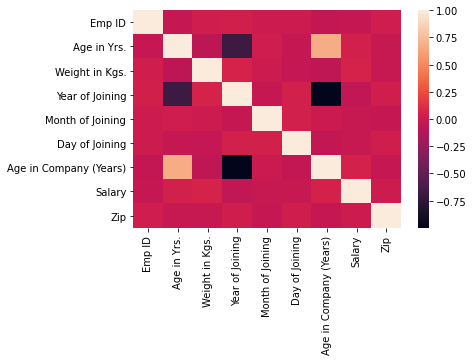

In [83]:
sns.heatmap(datacorr)

No column indicated proper co-relation with the Salary